In [18]:
# 1. Load Dataset
import pandas as pd

df = pd.read_csv("Advertising.csv")
print("1. Dataset Head:\n", df.head())


1. Dataset Head:
    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


2. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Missing Values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Pairplot of features:


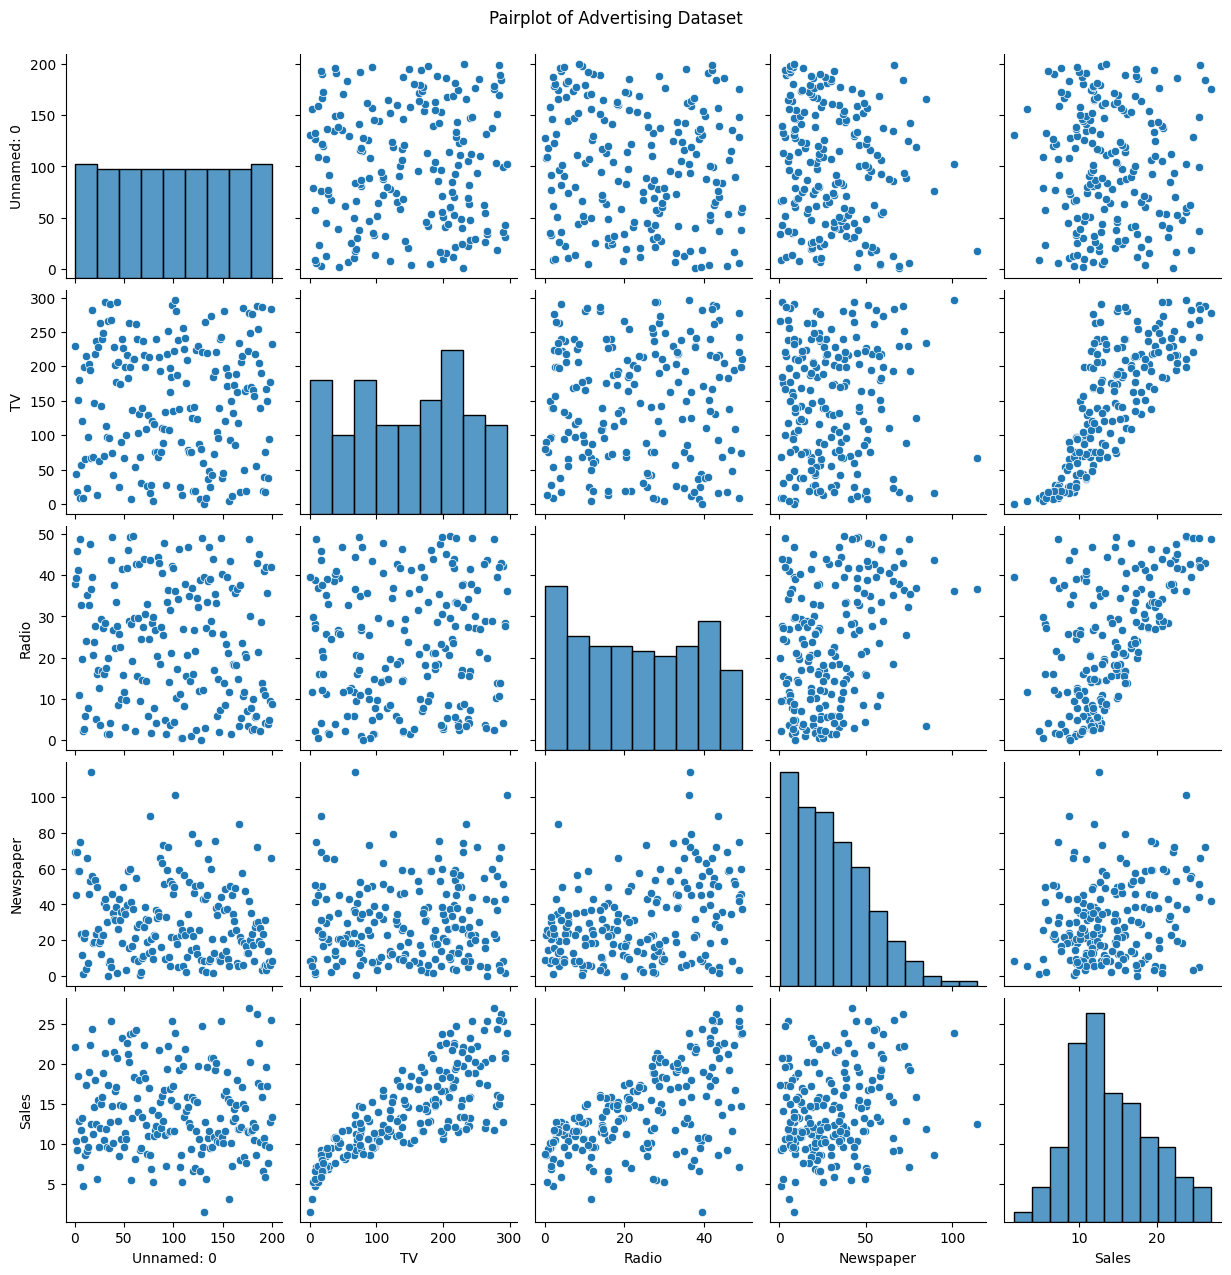

In [19]:
# 2. Data Info and Null Check
print("2. Dataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'

import seaborn as sns
import matplotlib.pyplot as plt

print("\nPairplot of features:")
sns.pairplot(df)
plt.suptitle("Pairplot of Advertising Dataset", y=1.02)
plt.show()


In [6]:
# 3. Split the Dataset
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("3. Split Completed")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


3. Split Completed
X_train shape: (160, 3)
X_test shape: (40, 3)


In [9]:
# 4. Train Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("4. Linear Regression Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)
print("Predicted Sales (Linear Regression):", lr_preds[:5])


4. Linear Regression Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629
Predicted Sales (Linear Regression): [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326]


In [11]:
# 5. Train Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

poly_model.fit(X_train, y_train)
poly_preds = poly_model.predict(X_test)

print("Predicted Sales (Polynomial Regression):", poly_preds[:5])


Predicted Sales (Polynomial Regression): [17.25443578 22.7193321  20.42799436  7.542709   24.37103037]


In [12]:
# 6. Train Support Vector Regression (SVR)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_preds = svr_model.predict(X_test_scaled)

print("Predicted Sales (SVR):", svr_preds[:5])


Predicted Sales (SVR): [17.1879597  21.60497277 19.5802057   9.76637843 19.9549199 ]


7. Model Evaluation:
                    Model       MAE       MSE      RMSE
0      Linear Regression  1.460757  3.174097  1.781600
1  Polynomial Regression  0.526179  0.412910  0.642581
2                    SVR  1.162139  2.862109  1.691777


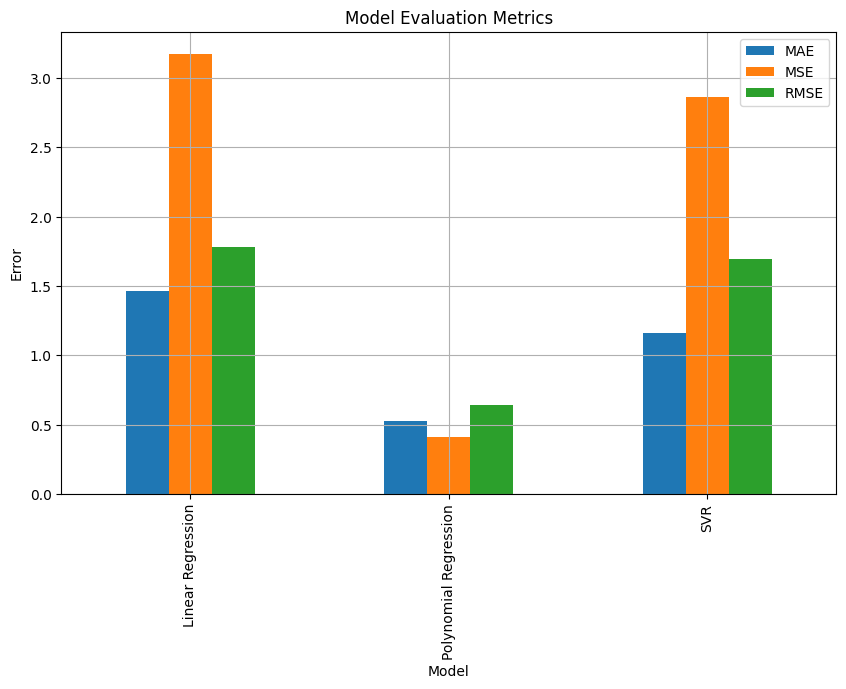

In [13]:
# 7. Evaluate Models
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse}

results = []
results.append(evaluate_model("Linear Regression", y_test, lr_preds))
results.append(evaluate_model("Polynomial Regression", y_test, poly_preds))
results.append(evaluate_model("SVR", y_test, svr_preds))

eval_df = pd.DataFrame(results)
print("Model Evaluation:\n", eval_df)
eval_df.set_index('Model')[['MAE', 'MSE', 'RMSE']].plot(kind='bar', figsize=(10, 6))
plt.title("Model Evaluation Metrics")
plt.ylabel("Error")
plt.grid(True)
plt.show()


In [17]:
# 8. Apply K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])
print("Cluster Labels Assigned:\n", df[['TV', 'Radio', 'Newspaper', 'Cluster']].head())

Cluster Labels Assigned:
       TV  Radio  Newspaper  Cluster
0  230.1   37.8       69.2        0
1   44.5   39.3       45.1        1
2   17.2   45.9       69.3        1
3  151.5   41.3       58.5        2
4  180.8   10.8       58.4        2


Cluster Visualization (TV vs Sales):


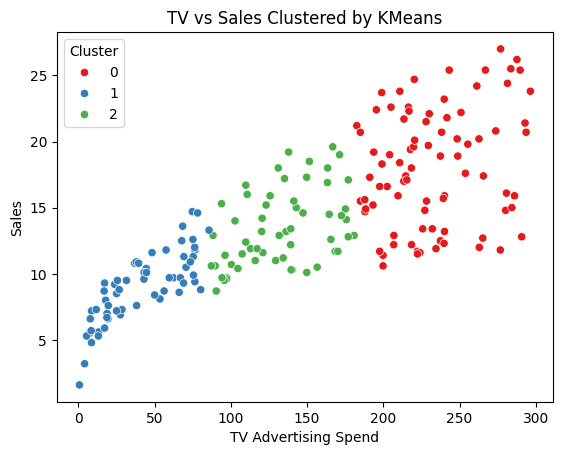

In [16]:
# 9. Visualize Clusters
print("Cluster Visualization (TV vs Sales):")
sns.scatterplot(data=df, x='TV', y='Sales', hue='Cluster', palette='Set1')
plt.title("TV vs Sales Clustered by KMeans")
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.show()